## Question 2

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [24]:
N_array = [5, 10, 20, 40, 60, 80, 500, 10**3, 10**4]
alpha = 5.5
beta = 1
lambda_true = 5
M = 200

In [25]:
def transform(x):
    return -np.log(x)/lambda_true

In [26]:
def lambda_MLE_relError():
    listEstimate = []
    for j in N_array:
        errorList = []
        for i in range(M):
            data = np.random.uniform(0, 1, (j,))
            lambda_estimate = j/np.sum(transform(data))
            error = abs(lambda_estimate - lambda_true)/lambda_true
            errorList.append(error)
        listEstimate.append(errorList)
        errorList = []
    return listEstimate

In [27]:
lambda_MLE = lambda_MLE_relError()

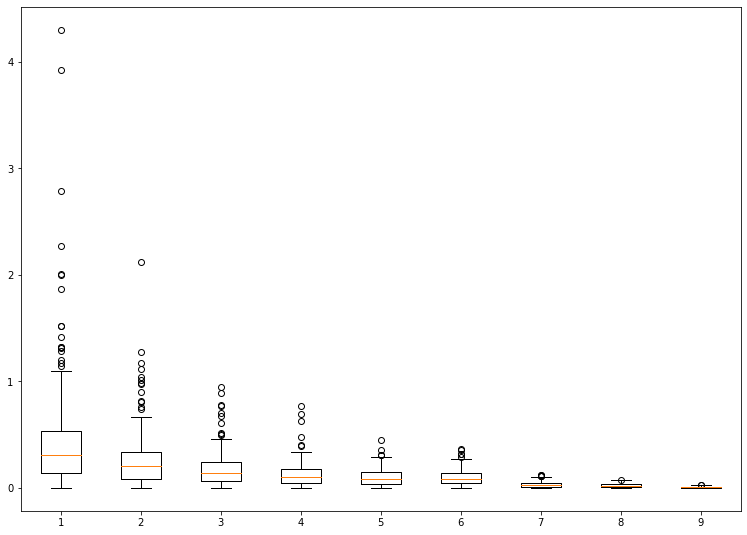

In [28]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(lambda_MLE)
 
plt.show()

In [29]:
def lambda_MAP_relError():
    listEstimate = []
    for j in N_array:
        errorList = []
        for i in range(M):
            data = np.random.uniform(0, 1, (j,))
            lambda_estimate = (j + alpha - 1)/(np.sum(transform(data)) + beta)
            error = abs(lambda_estimate - lambda_true)/lambda_true
            errorList.append(error)
        listEstimate.append(errorList)
        errorList = []
    return listEstimate

In [30]:
lambda_MAP = lambda_MAP_relError()

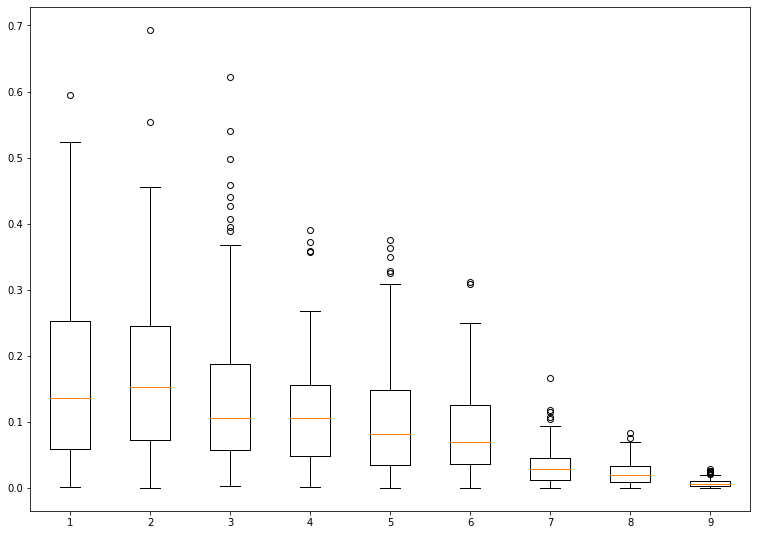

In [31]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(lambda_MAP)
 
plt.show()

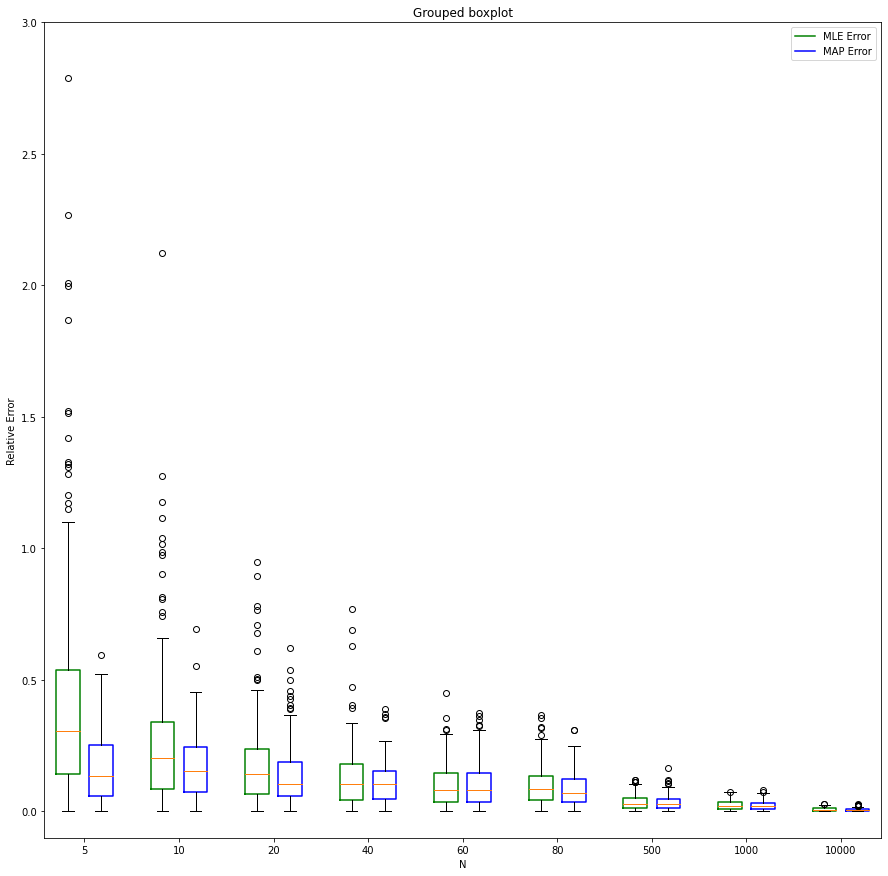

In [45]:
plt.figure(figsize=(15, 15))

pl1 = plt.boxplot(lambda_MLE, positions=np.array(np.arange(len(lambda_MLE)))*2 - 0.35, widths=0.5)
pl2 = plt.boxplot(lambda_MAP, positions=np.array(np.arange(len(lambda_MAP)))*2 + 0.35, widths=0.5)

plt.setp(pl1['boxes'], color='green', linewidth=1.5)
plt.setp(pl2['boxes'], color='blue', linewidth=1.5)

def define_box_properties(plot_name, color_code, label):
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label = label)
    plt.legend()


plt.xticks(np.array(range(len(N_array)))*2, N_array)
plt.xlabel('N')
plt.ylabel('Relative Error')

# setting colors for each groups
define_box_properties(pl1, 'green', 'MLE Error')
define_box_properties(pl2, 'blue', 'MAP Error')

plt.title('Grouped boxplot')
plt.show()